In [5]:
pip install seaborn plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 2.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importing necessary libraries for detailed and colorful EDA
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from scipy.stats import chi2_contingency, ttest_ind, f_oneway, shapiro, anderson, pearsonr, spearmanr

# Increase default plot size and set a vibrant style
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette("bright")

# Load the dataset
file_path = '/home/aman/Home/KAPIL/workout_fitness_tracker_data.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
df.head()


User ID  Age  Gender  Height (cm)  Weight (kg) Workout Type  \
0        1   39    Male          175           99      Cycling   
1        2   36   Other          157          112       Cardio   
2        3   25  Female          180           66         HIIT   
3        4   56    Male          154           89      Cycling   
4        5   53   Other          194           59     Strength   

   Workout Duration (mins)  Calories Burned  Heart Rate (bpm)  Steps Taken  \
0                       79              384               112         8850   
1                       73              612               168         2821   
2                       27              540               133        18898   
3                       39              672               118        14102   
4                       56              410               170        16518   

   Distance (km) Workout Intensity  Sleep Hours  Water Intake (liters)  \
0          14.44              High          8.2                    1.9   
1           1.10              High          8.6                    1.9   
2           7.28              High          9.8                    1.9   
3           6.55            Medium          5.8                    1.9   
4           3.17            Medium          7.3                    1.9   

   Daily Calories Intake  Resting Heart Rate (bpm)  VO2 Max  Body Fat (%)  \
0                   3195                        61     38.4          28.5   
1                   2541                        73     38.4          28.5   
2                   3362                        80     38.4          28.5   
3                   2071                        65     38.4          28.5   
4                   3298                        59     38.4          28.5   

  Mood Before Workout Mood After Workout  
0               Tired           Fatigued  
1               Happy          Energized  
2               Happy           Fatigued  
3             Neutral            Neutral  
4            Stressed          Energized

In [7]:
# Checking for missing values, duplicates, and data types

# Summary of the dataset
df_info = df.info()

# Checking for missing values
missing_values = df.isnull().sum()

# Checking for duplicates
duplicate_rows = df.duplicated().sum()

# Displaying basic statistics for numeric columns
numeric_summary = df.describe()

# Displaying basic statistics for categorical columns
categorical_summary = df.describe(include=['object'])

df_info, missing_values, duplicate_rows, numeric_summary, categorical_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

(None,
 User ID                     0
 Age                         0
 Gender                      0
 Height (cm)                 0
 Weight (kg)                 0
 Workout Type                0
 Workout Duration (mins)     0
 Calories Burned             0
 Heart Rate (bpm)            0
 Steps Taken                 0
 Distance (km)               0
 Workout Intensity           0
 Sleep Hours                 0
 Water Intake (liters)       0
 Daily Calories Intake       0
 Resting Heart Rate (bpm)    0
 VO2 Max                     0
 Body Fat (%)                0
 Mood Before Workout         0
 Mood After Workout          0
 dtype: int64,
 np.int64(0),
            User ID           Age   Height (cm)   Weight (kg)  \
 count  10000.00000  10000.000000  10000.000000  10000.000000   
 mean    5000.50000     38.390100    174.275100     84.903000   
 std     2886.89568     12.171637     14.440986     20.189937   
 min        1.00000     18.000000    150.000000     50.000000   
 25%     2500.75000

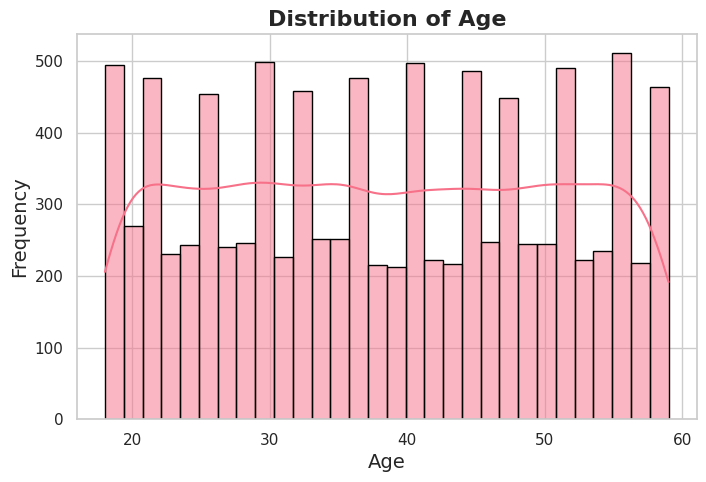

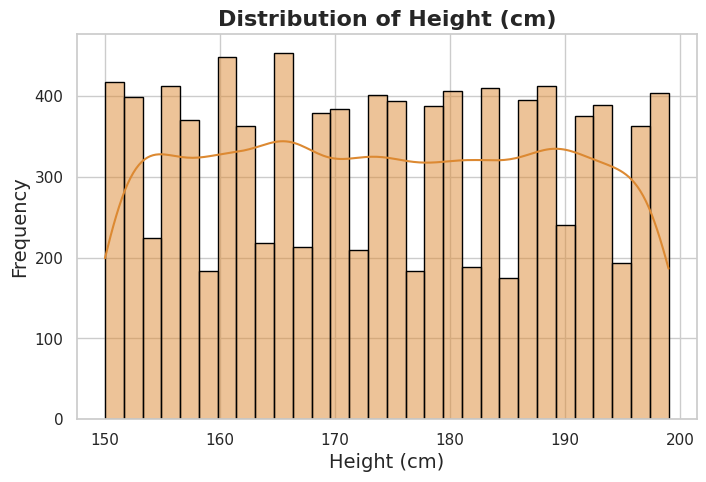

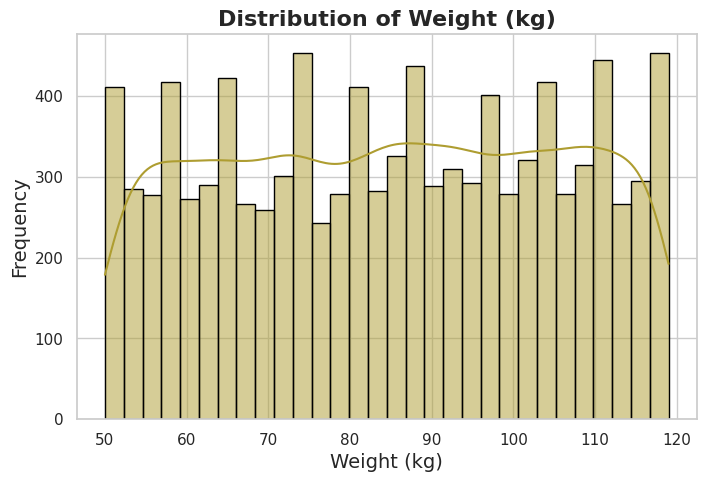

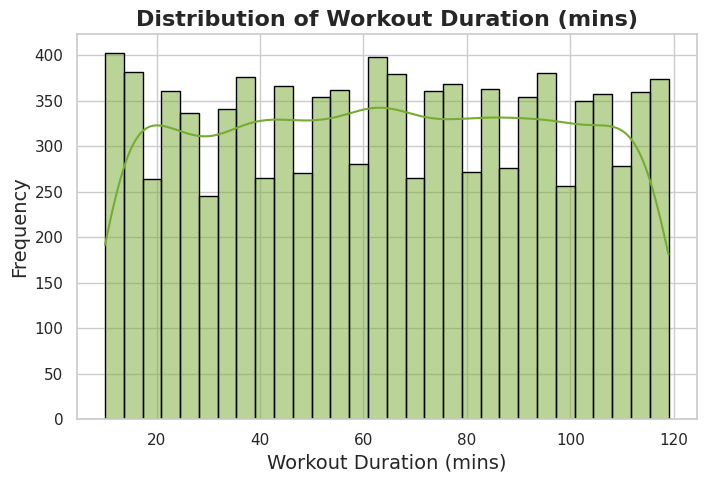

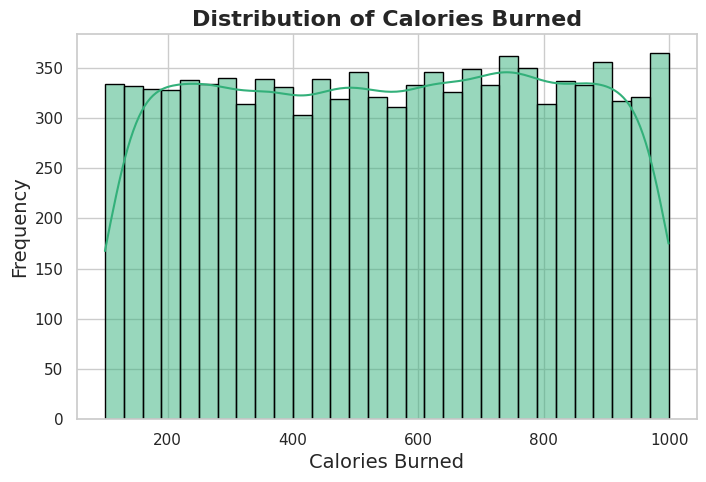

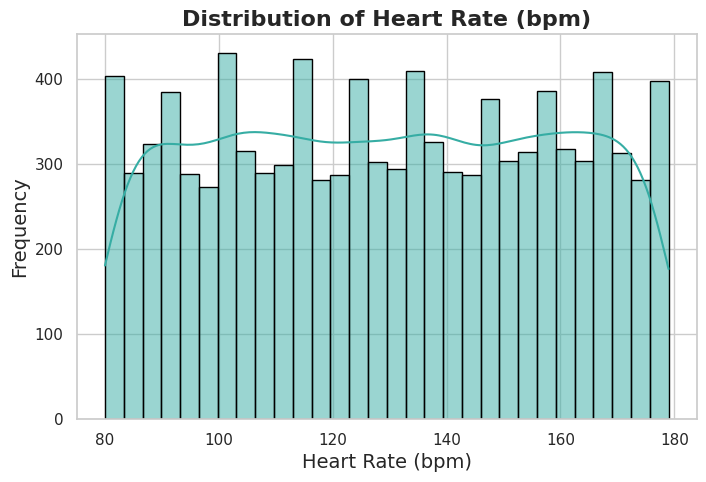

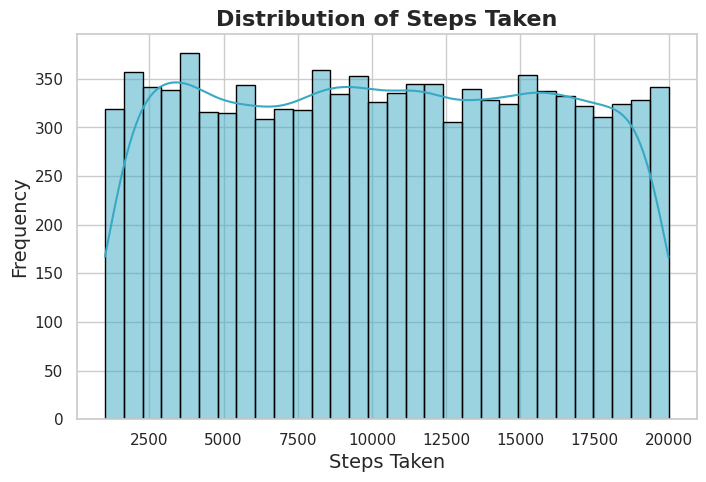

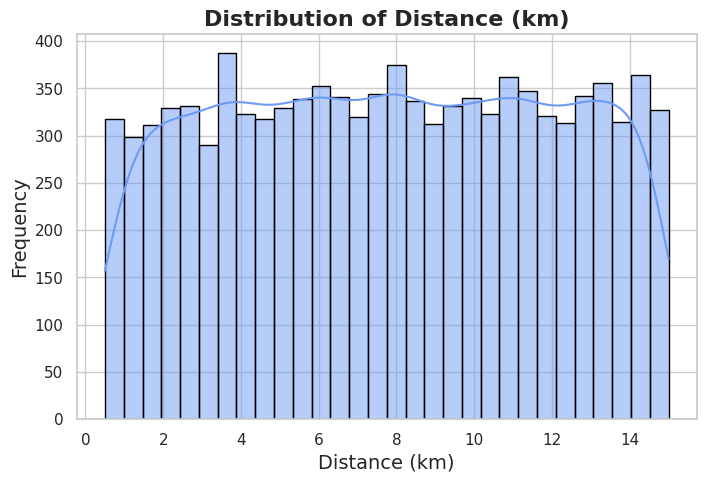

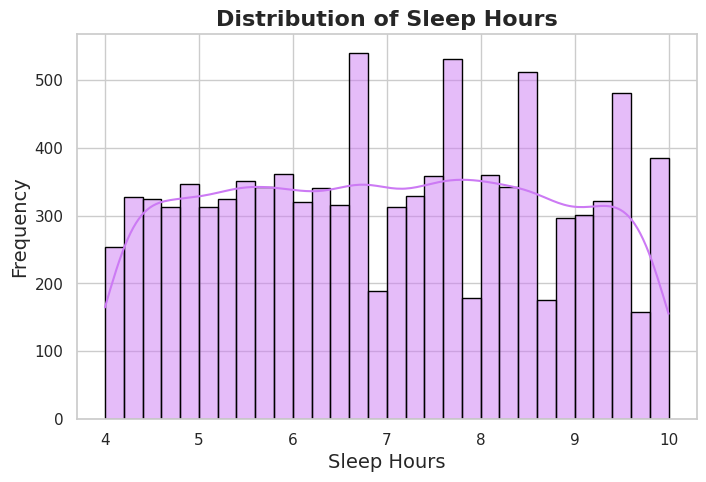

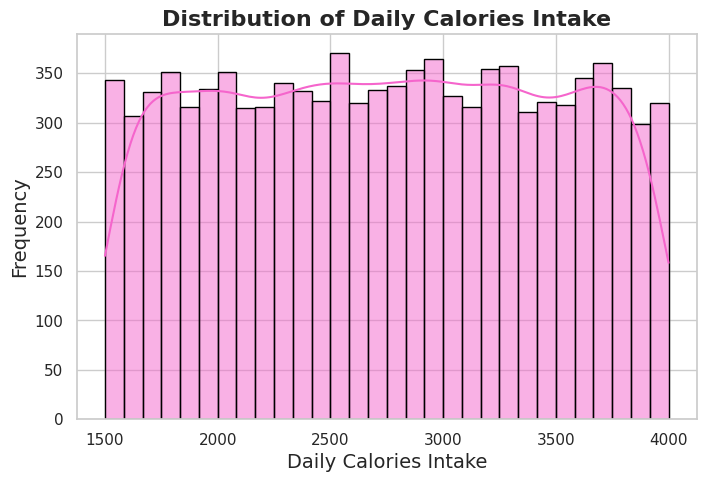

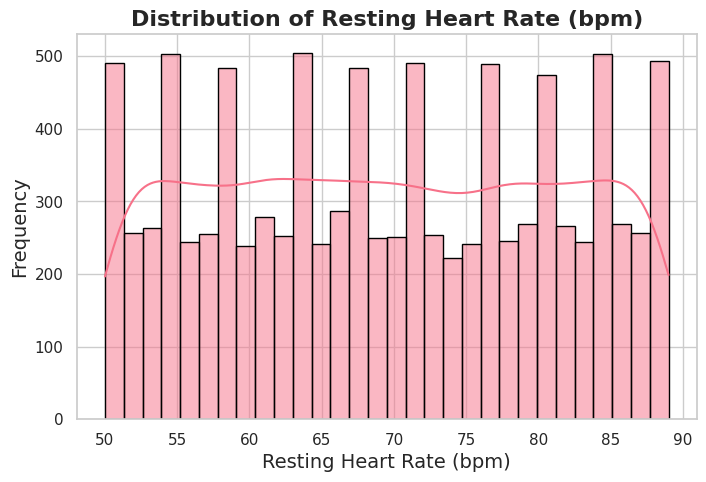

In [8]:
# Univariate Analysis: Distribution of Numerical Columns with Vibrant Colors

# Selecting only relevant numerical columns (excluding 'User ID' and constant columns)
numerical_columns = [
    'Age', 'Height (cm)', 'Weight (kg)', 'Workout Duration (mins)', 'Calories Burned',
    'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Sleep Hours',
    'Daily Calories Intake', 'Resting Heart Rate (bpm)'
]

# Plotting histograms and density plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, edgecolor='black', color=sns.color_palette("husl", 10)[numerical_columns.index(col) % 10])
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()


/tmp/ipykernel_264886/3223375488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set3", edgecolor='black')


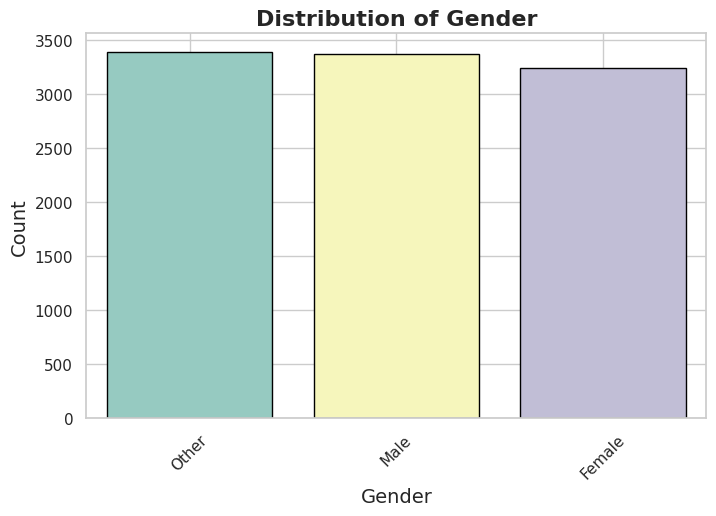

/tmp/ipykernel_264886/3223375488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set3", edgecolor='black')


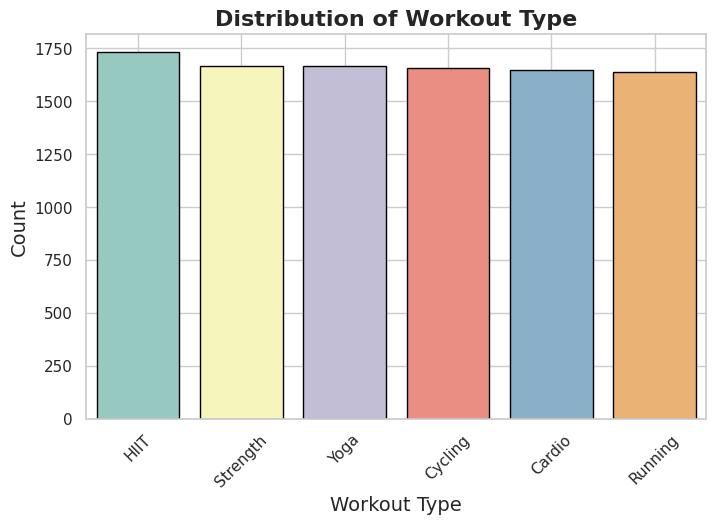

/tmp/ipykernel_264886/3223375488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set3", edgecolor='black')


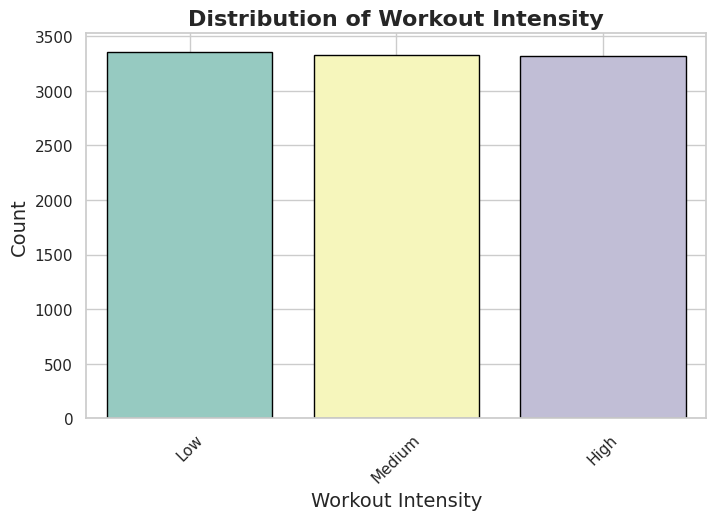

/tmp/ipykernel_264886/3223375488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set3", edgecolor='black')


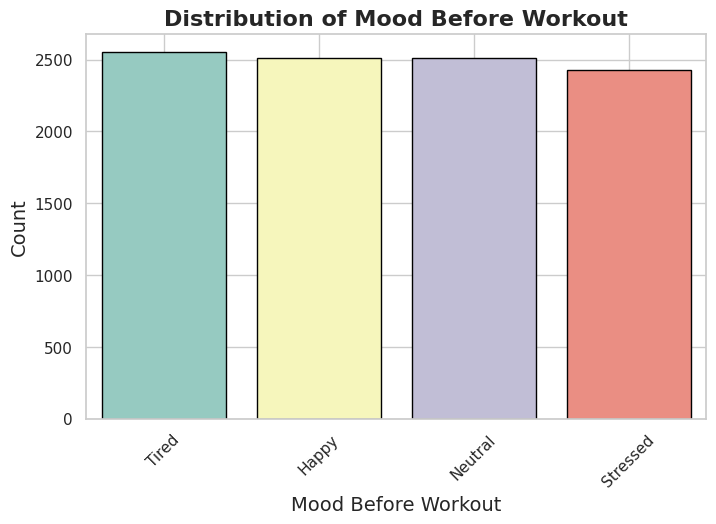

/tmp/ipykernel_264886/3223375488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set3", edgecolor='black')


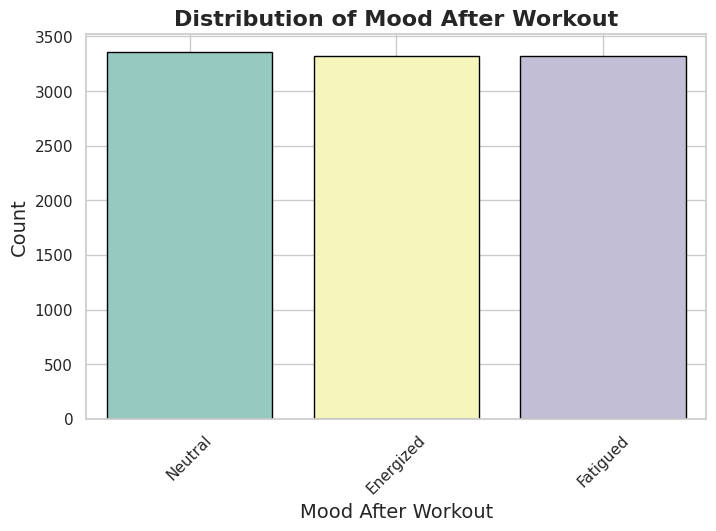

In [9]:
# Univariate Analysis: Categorical Columns with Vibrant Bar Plots

categorical_columns = ['Gender', 'Workout Type', 'Workout Intensity', 'Mood Before Workout', 'Mood After Workout']

# Plotting bar plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set3", edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


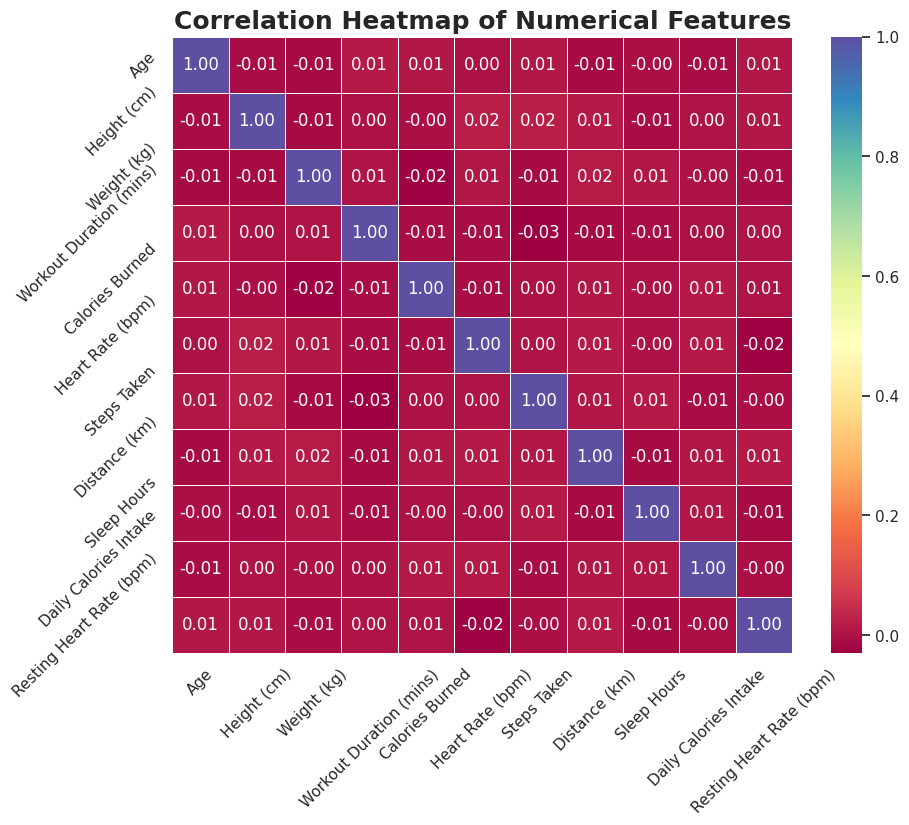

In [10]:
# Bivariate Analysis: Correlation Heatmap for Numerical Columns

# Calculating the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap with vibrant colors
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', linewidths=0.5, linecolor='white', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


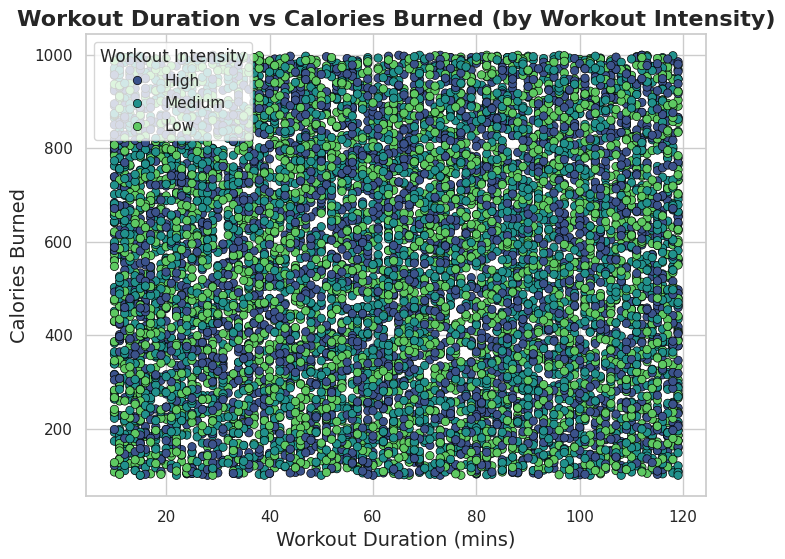

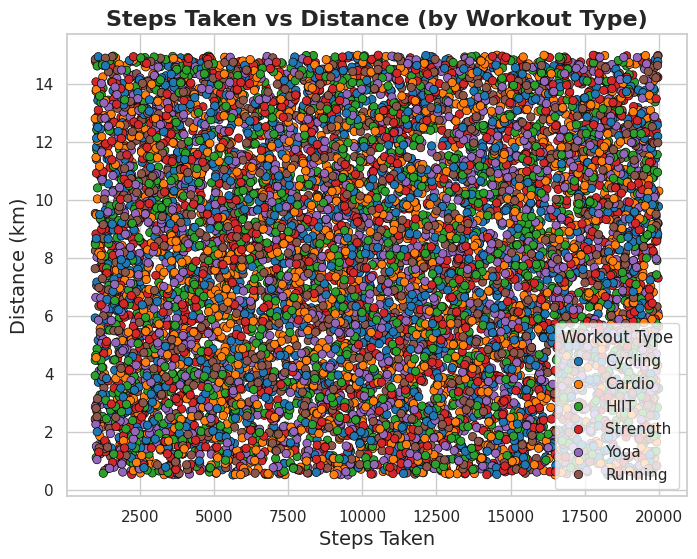

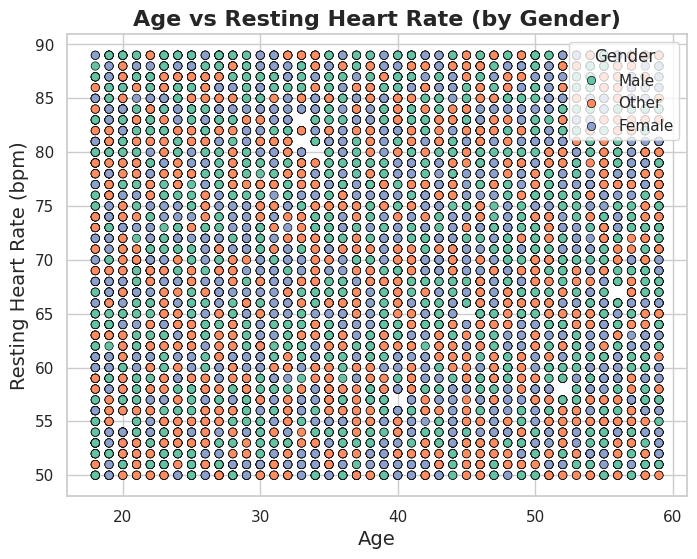

In [11]:
# Bivariate Analysis: Scatter Plots for Key Numerical Relationships

# Scatter plot for Workout Duration vs Calories Burned
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Workout Duration (mins)', y='Calories Burned', hue='Workout Intensity', palette='viridis', edgecolor='black')
plt.title('Workout Duration vs Calories Burned (by Workout Intensity)', fontsize=16, fontweight='bold')
plt.xlabel('Workout Duration (mins)', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)
plt.grid(True)
plt.show()

# Scatter plot for Steps Taken vs Distance (km)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Steps Taken', y='Distance (km)', hue='Workout Type', palette='tab10', edgecolor='black')
plt.title('Steps Taken vs Distance (by Workout Type)', fontsize=16, fontweight='bold')
plt.xlabel('Steps Taken', fontsize=14)
plt.ylabel('Distance (km)', fontsize=14)
plt.grid(True)
plt.show()

# Scatter plot for Age vs Resting Heart Rate (bpm)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Resting Heart Rate (bpm)', hue='Gender', palette='Set2', edgecolor='black')
plt.title('Age vs Resting Heart Rate (by Gender)', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Resting Heart Rate (bpm)', fontsize=14)
plt.grid(True)
plt.show()


/tmp/ipykernel_264886/951428933.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Workout Type', y='Calories Burned', palette="Set3")


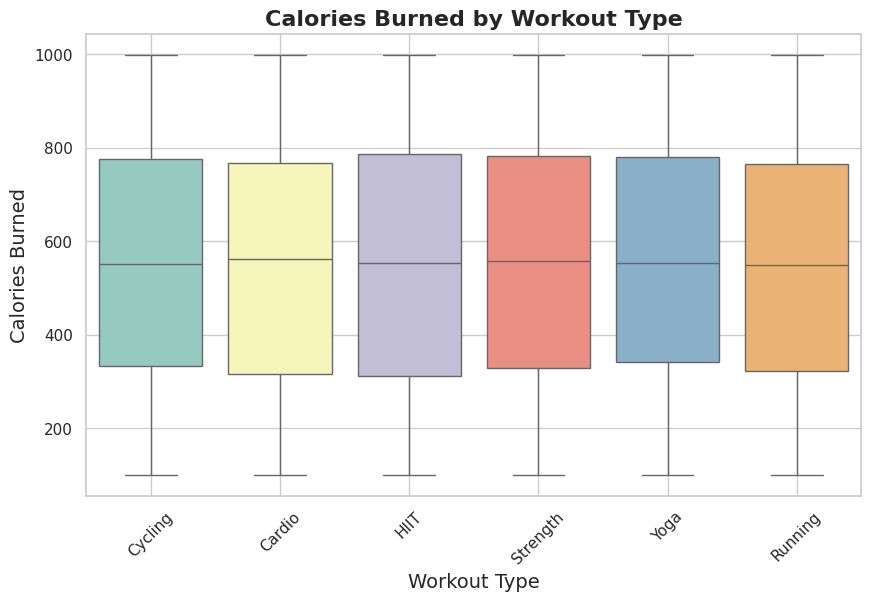

/tmp/ipykernel_264886/951428933.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Workout Intensity', y='Heart Rate (bpm)', palette="Set2")


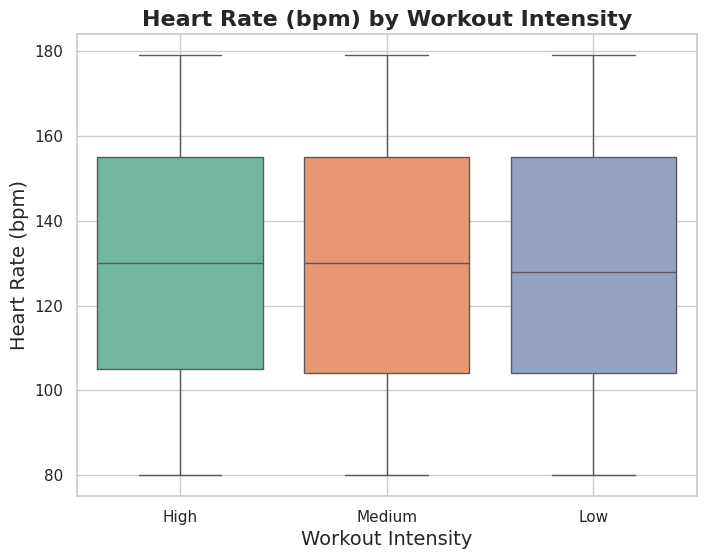

/tmp/ipykernel_264886/951428933.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Steps Taken', palette="muted")


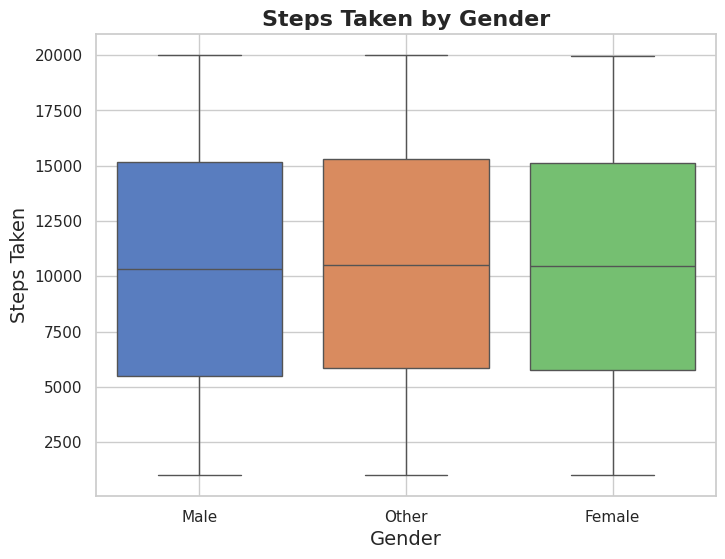

In [12]:
# Bivariate Analysis: Categorical vs Numerical with Vibrant Box Plots

# Box plot for Calories Burned by Workout Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout Type', y='Calories Burned', palette="Set3")
plt.title('Calories Burned by Workout Type', fontsize=16, fontweight='bold')
plt.xlabel('Workout Type', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Box plot for Heart Rate (bpm) by Workout Intensity
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Workout Intensity', y='Heart Rate (bpm)', palette="Set2")
plt.title('Heart Rate (bpm) by Workout Intensity', fontsize=16, fontweight='bold')
plt.xlabel('Workout Intensity', fontsize=14)
plt.ylabel('Heart Rate (bpm)', fontsize=14)
plt.grid(True)
plt.show()

# Box plot for Steps Taken by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Steps Taken', palette="muted")
plt.title('Steps Taken by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Steps Taken', fontsize=14)
plt.grid(True)
plt.show()


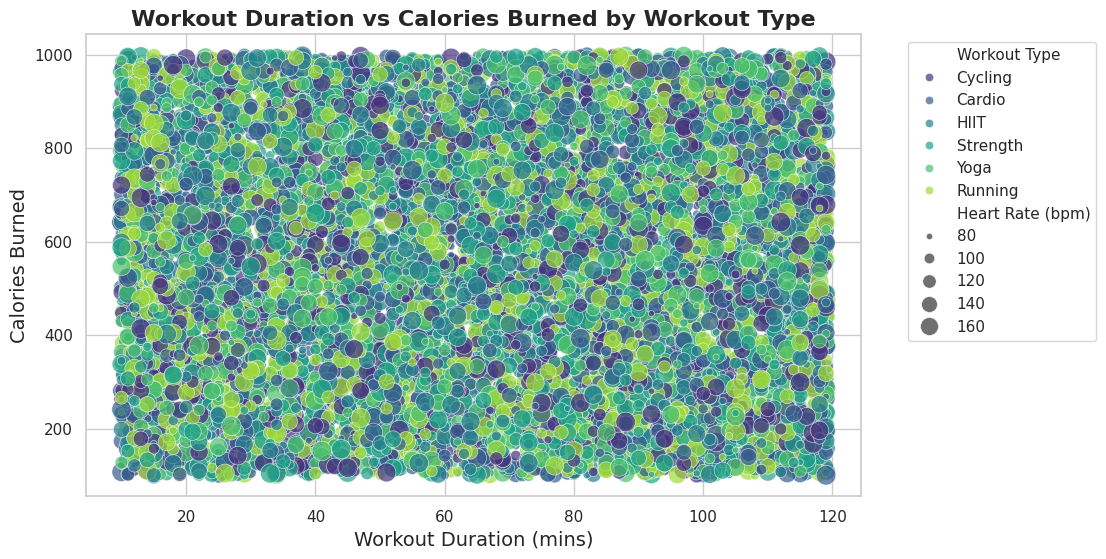

/tmp/ipykernel_264886/1928191098.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




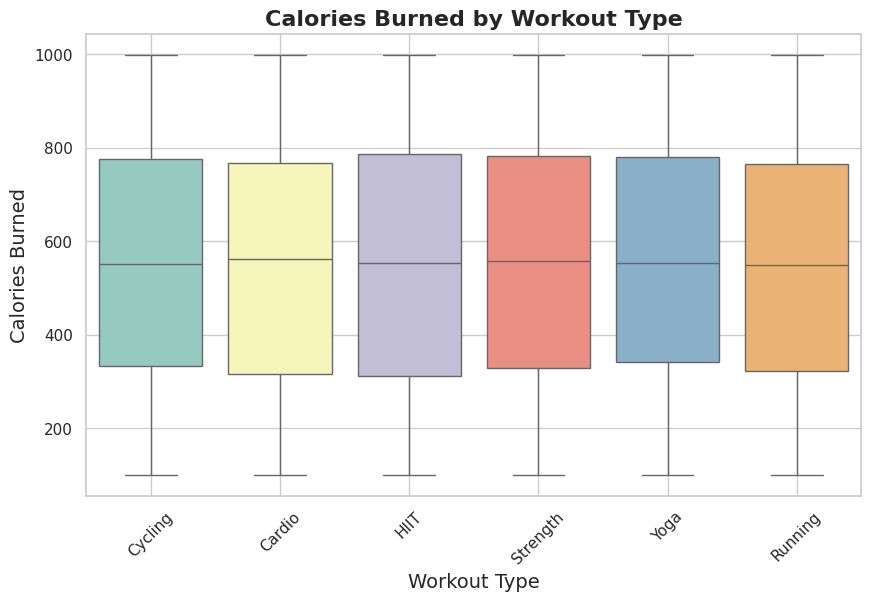

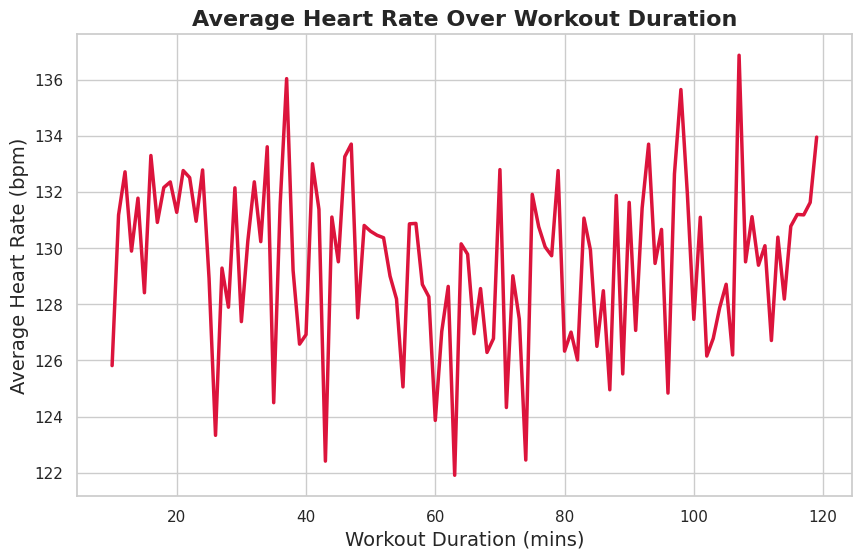

In [14]:
# Static but Vibrant Visualizations as an Alternative to Interactive Plots

# Scatter Plot: Workout Duration vs Calories Burned by Workout Type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Workout Duration (mins)', y='Calories Burned', hue='Workout Type',
                size='Heart Rate (bpm)', sizes=(20, 200), alpha=0.7, palette='viridis')
plt.title('Workout Duration vs Calories Burned by Workout Type', fontsize=16, fontweight='bold')
plt.xlabel('Workout Duration (mins)', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Box Plot: Calories Burned by Workout Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout Type', y='Calories Burned', palette="Set3")
plt.title('Calories Burned by Workout Type', fontsize=16, fontweight='bold')
plt.xlabel('Workout Type', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Line Plot: Average Heart Rate Over Workout Duration
average_heart_rate = df.groupby('Workout Duration (mins)')['Heart Rate (bpm)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_heart_rate, x='Workout Duration (mins)', y='Heart Rate (bpm)', color='crimson', linewidth=2.5)
plt.title('Average Heart Rate Over Workout Duration', fontsize=16, fontweight='bold')
plt.xlabel('Workout Duration (mins)', fontsize=14)
plt.ylabel('Average Heart Rate (bpm)', fontsize=14)
plt.grid(True)
plt.show()
